In [169]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [170]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots
import errors


In [171]:
# Define parameters
N=10
lmd = 0.02272
J = 0.5
state_dictionary = {"1":1}

ti = 0
tf = 150
Nsteps = 500

In [172]:
# Define intial and target systems
initial_state_DW, target_state_DW, register_size = md.create_DW_initial_and_target(state_dictionary, N)

initial_state_ST, target_state_ST = md.create_ST_initial_and_target(state_dictionary, N)

In [173]:
#    def __init__(self, system_size, mode, lambda_factor, register_size=None, global_J=None,
#                 j_error = None, z_error = None, l_error = None):


H_t = Ham.Hamiltonian(system_size = N,
                    mode = "transport",
                    lambda_factor = lmd,
                    global_J = J,
                    j_error = 0.002,
                    l_error = 0.05,
                    z_error = 0.002
                    )
H_r = Ham.Hamiltonian(system_size = N,
                    mode = "reset",
                    lambda_factor = lmd,
                    register_size = register_size,
                    global_J = J,
                    j_error = 0.002,
                    l_error = 0.05,
                    z_error = 0.002
                    )

In [174]:
# Calibrate chain under ideal circumstances
transport_steps, transport_time = dyn.chain_calibration(initial_state_DW, H_t, ti, tf, Nsteps)

In [175]:
# test that algorithm works well without errors
fidelity, magnetizations = dyn.TwoStepAlgorithm(initial_state_DW, target_state_DW, H_t, H_r, ti, transport_time, transport_steps, factor = 1.12)

print(max(fidelity))

0.8916064756612517


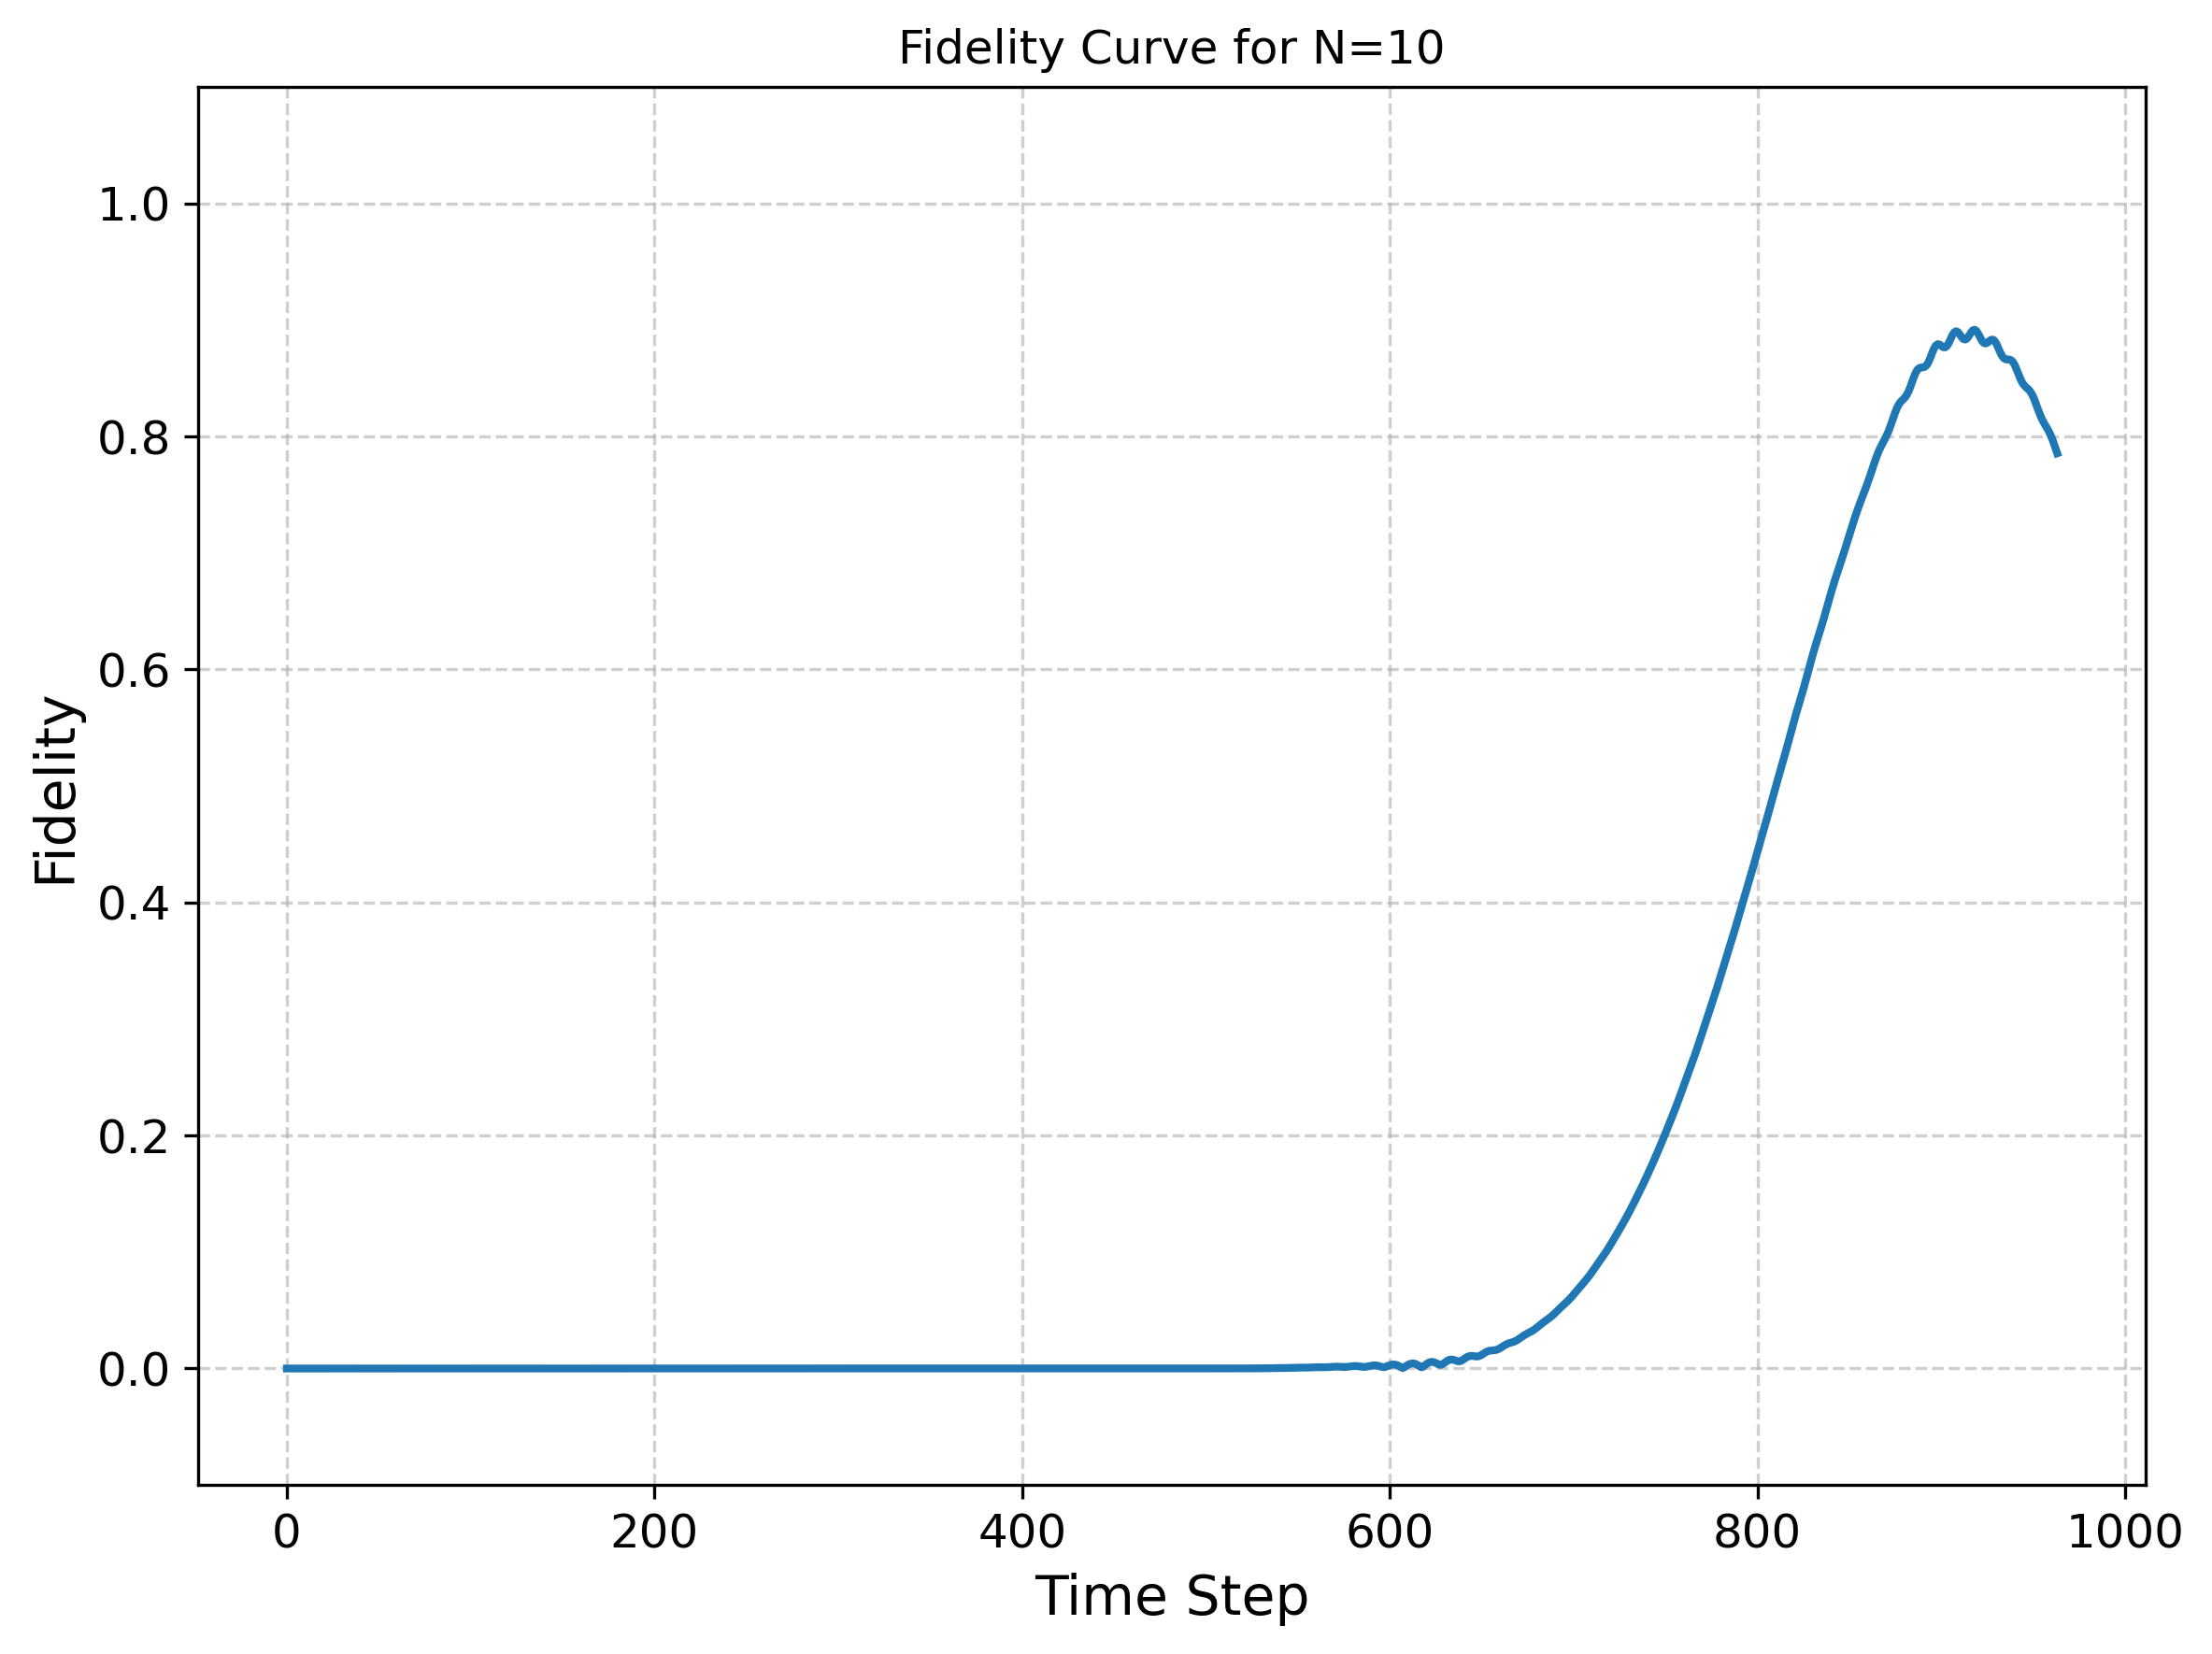

In [176]:
#Test plots
plots.plot_fidelity(fidelity, N)

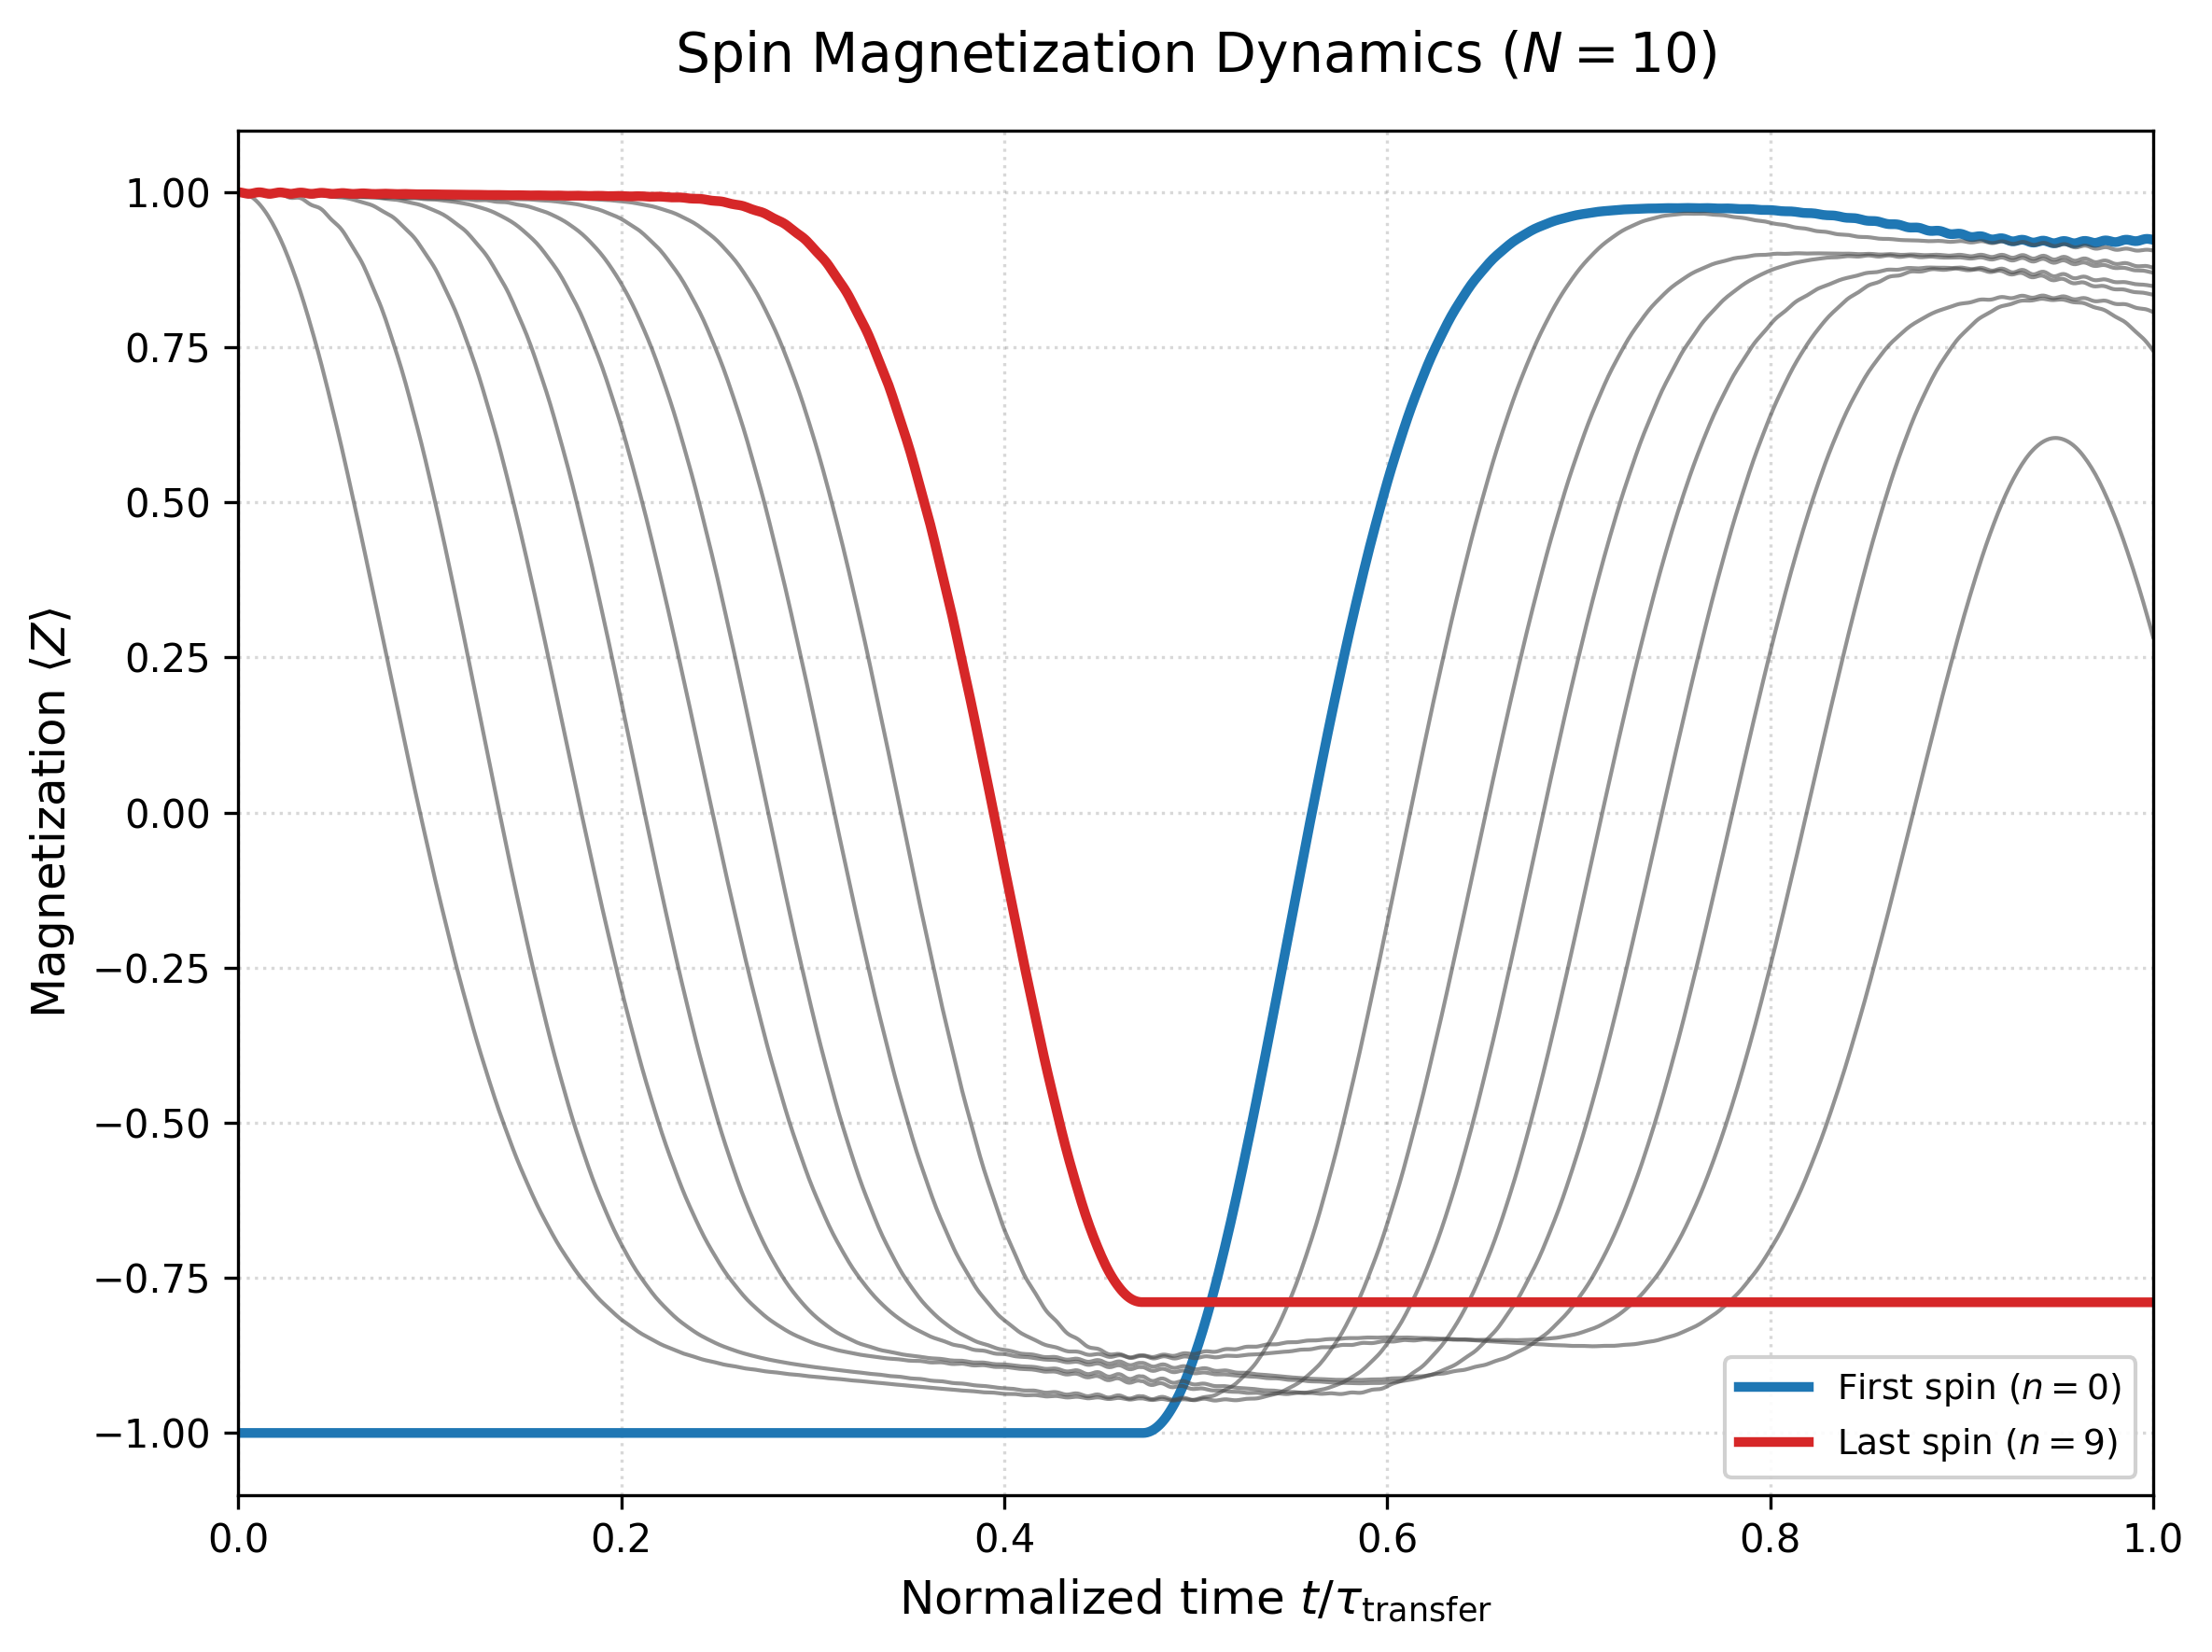

In [177]:
#Test plots
plots.plot_z_expectations(magnetizations, N)

In [242]:
# Standard version


H_s = Ham.Hamiltonian(system_size = N,
                    mode = "standard",
                    lambda_factor = lmd,
                    l_error = 0.1,
                    z_error = 0.005
                    )


N=10
ti = 0
tf = 150
Nsteps = 500

In [243]:
# Calibrate chain under ideal circumstances
transport_steps, transport_time = dyn.chain_calibration(initial_state_ST, H_t, ti, tf, Nsteps)

In [245]:
# test that algorithm works well without errors
fidelity, magnetizations = dyn.OneStepAlgorithm(initial_state_ST, target_state_ST, H_s, ti, transport_time, transport_steps, factor = 1.12)

print(max(fidelity))

0.944359412446208


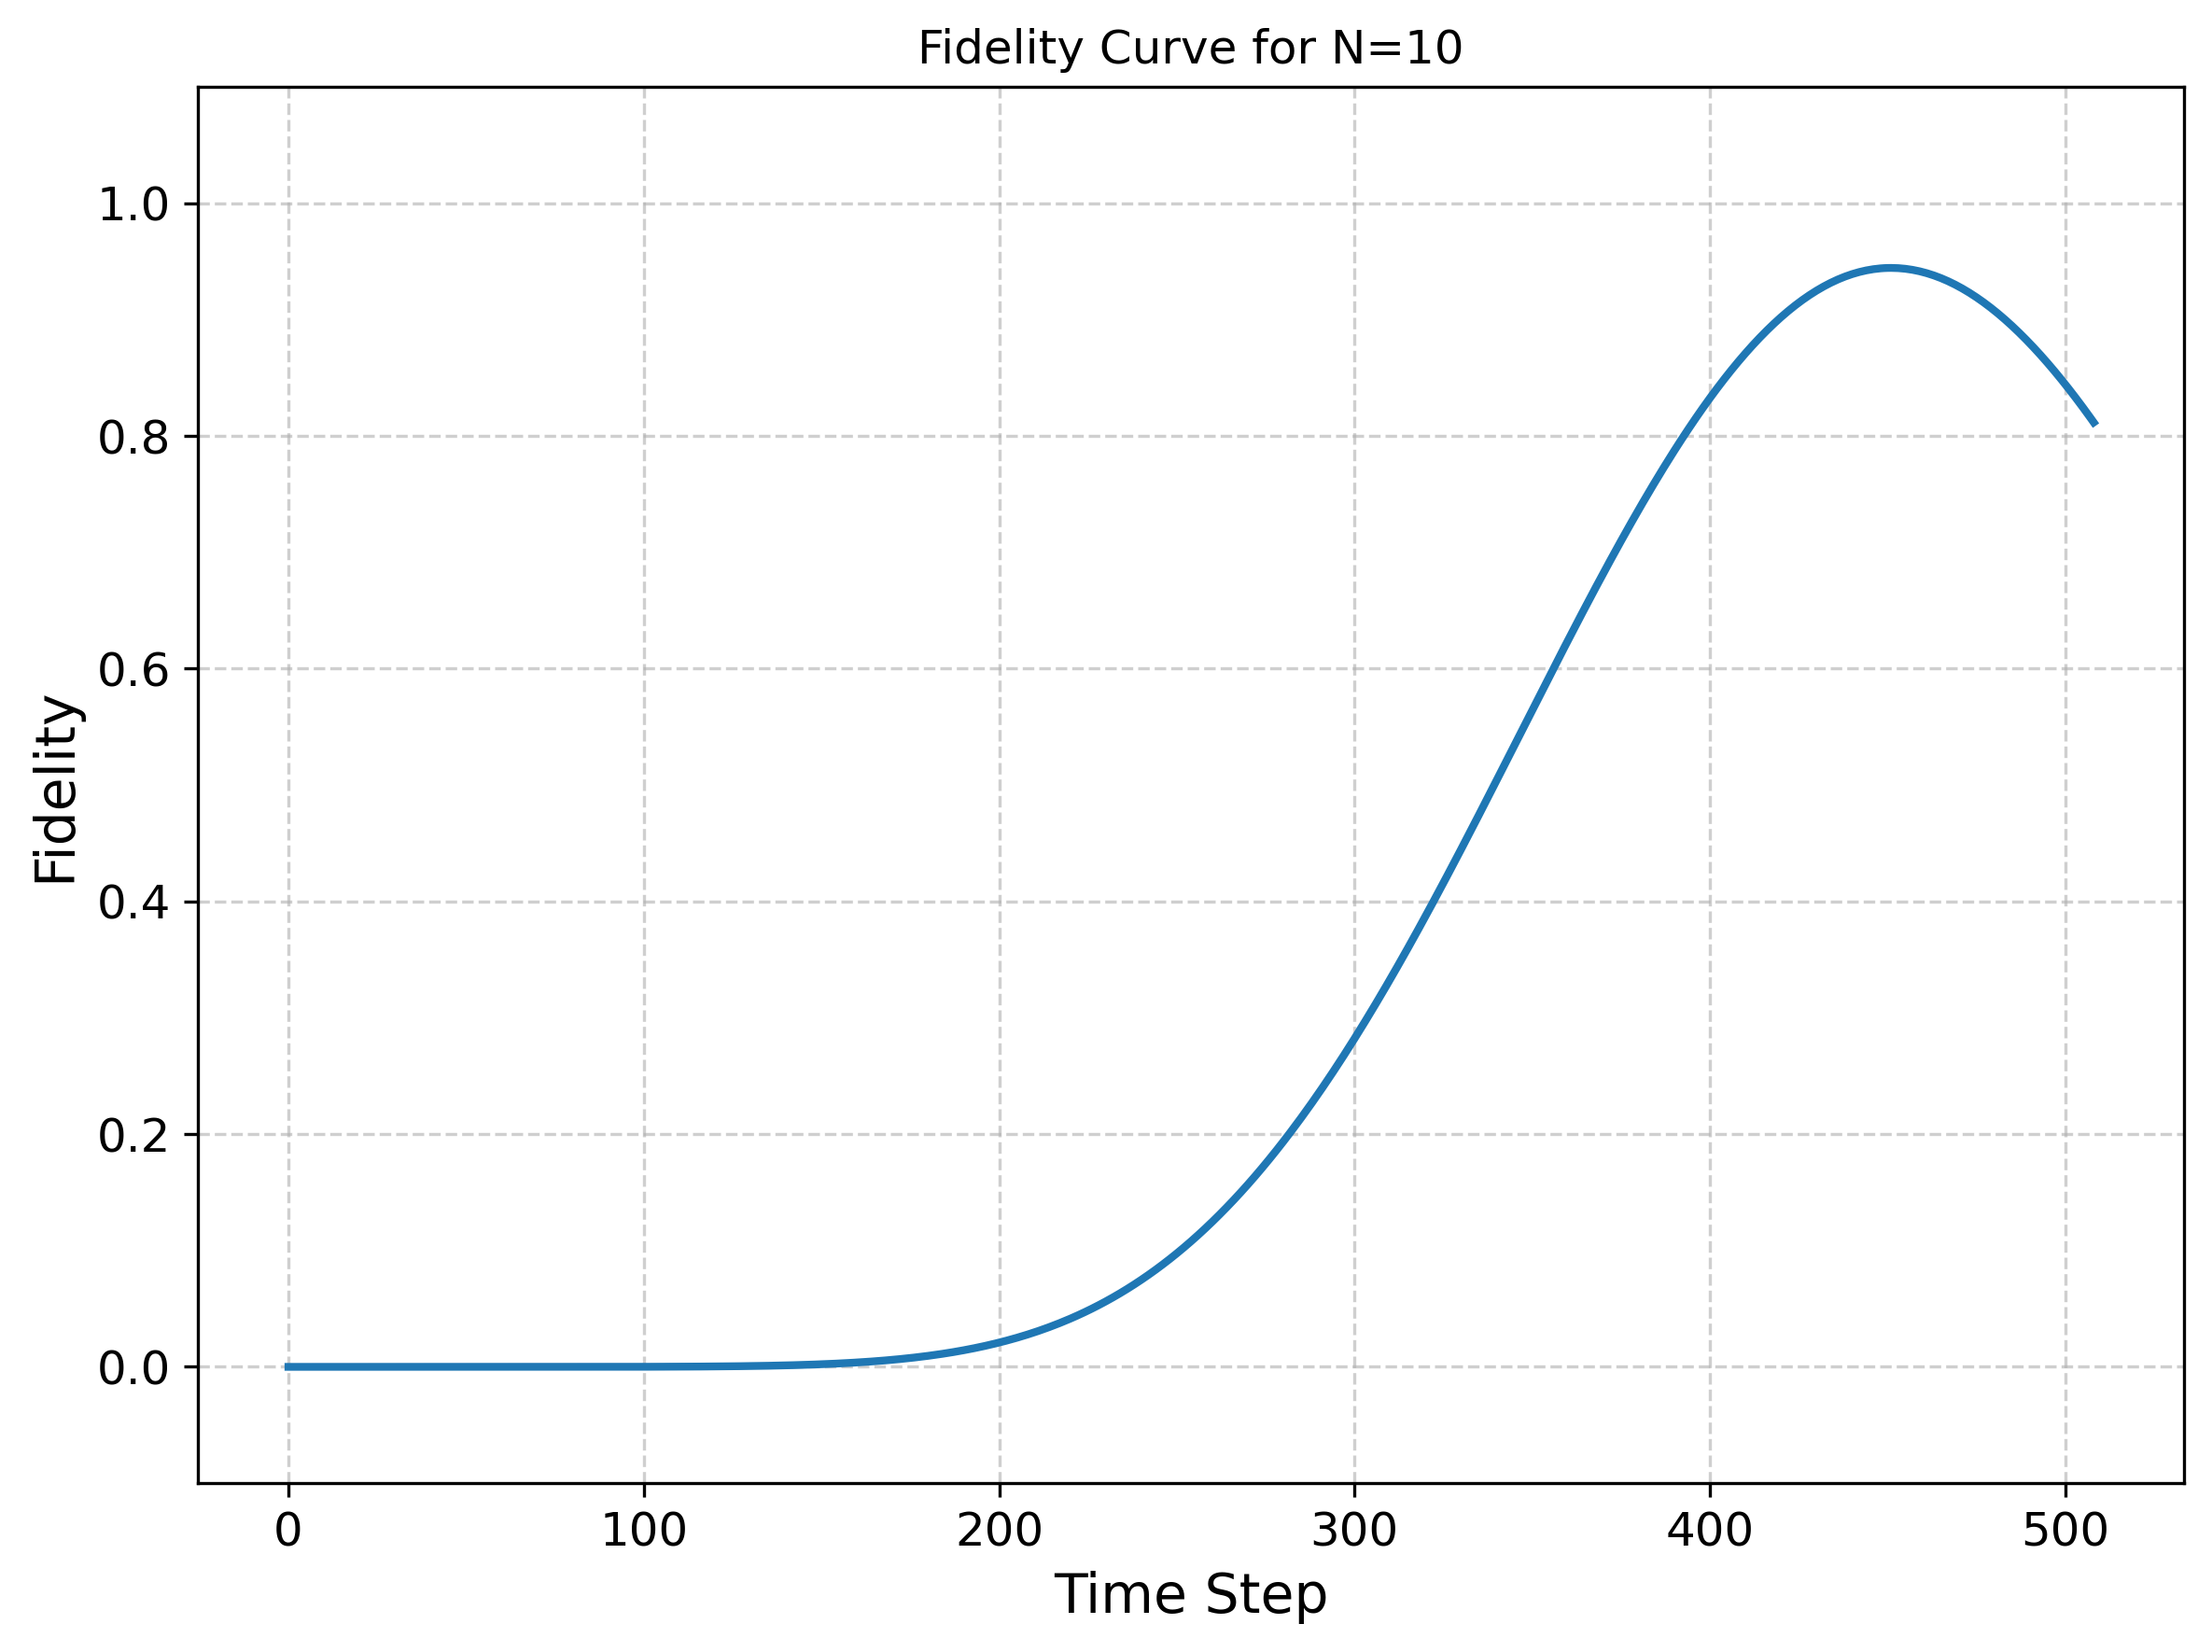

In [246]:
#Test plots
plots.plot_fidelity(fidelity, N)

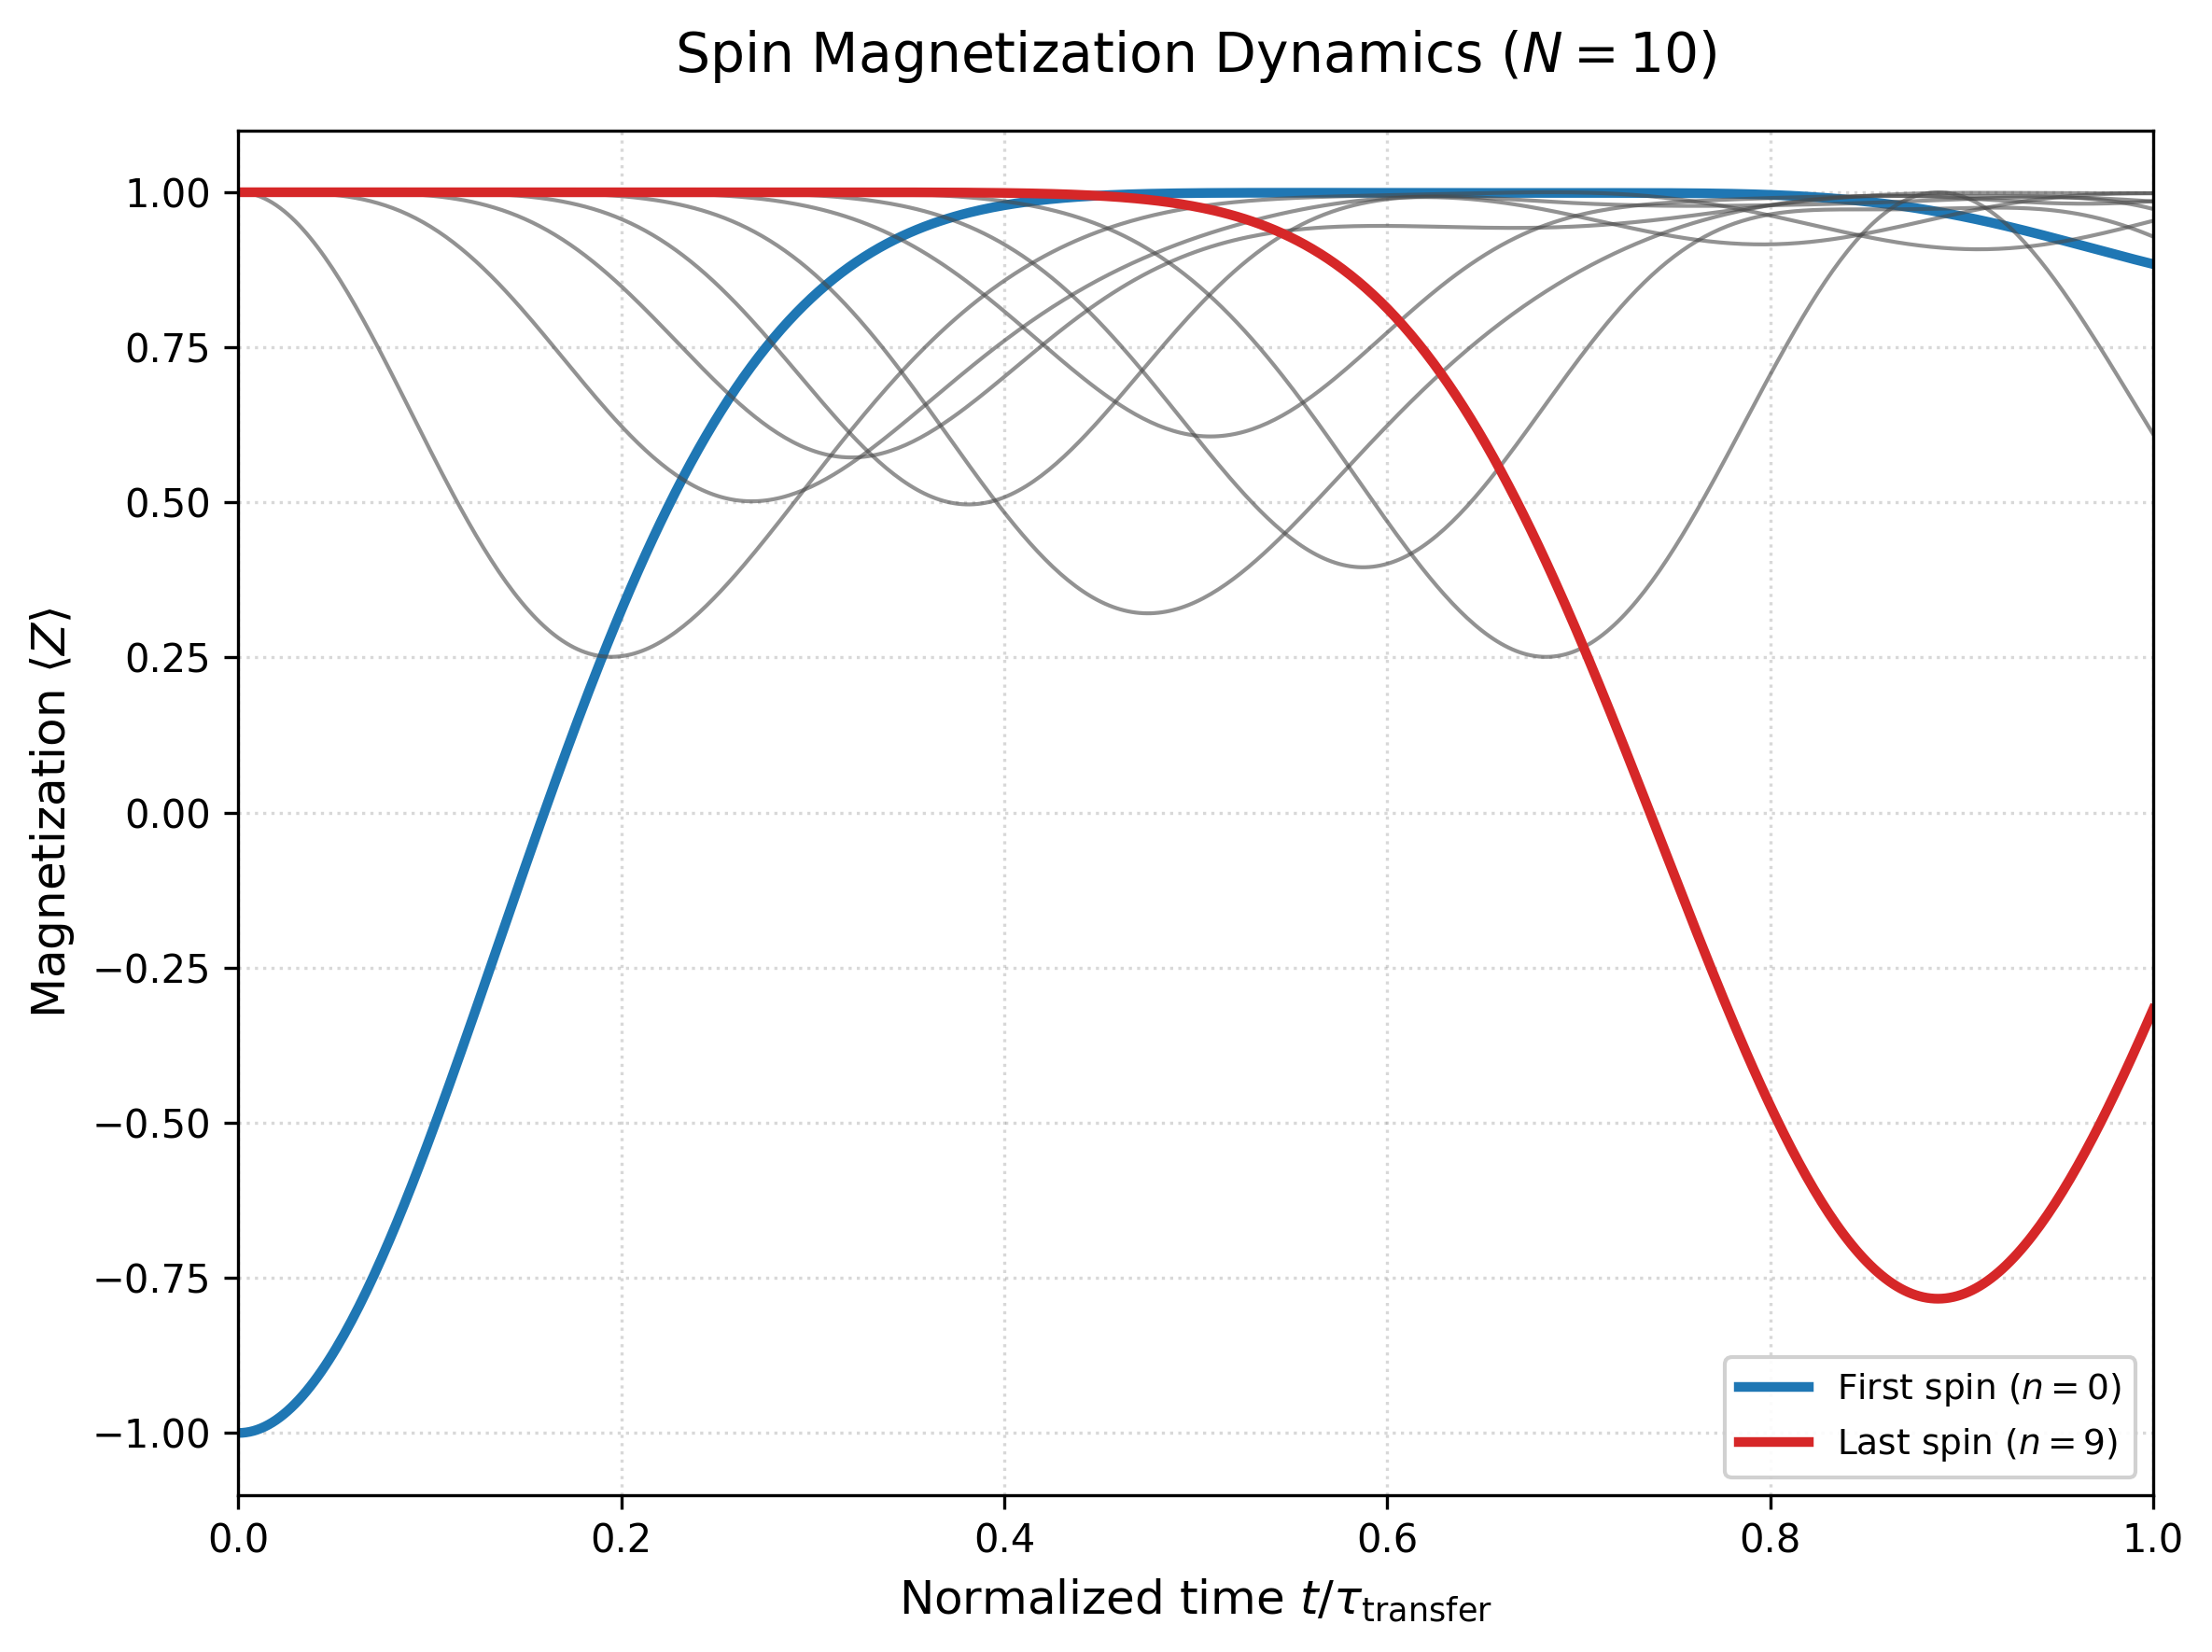

In [247]:
#Test plots
plots.plot_z_expectations(magnetizations, N)